In [1]:
## general imports
import json
import numpy as np
import sys

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
## set paths
#dataDir  = '.'
#dataType = 'val2014'
#annType  = 'person_keypoints'
#teamName = 'fakekeypoints100'

#annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
#resFile  = '%s/detections/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)
annFile  = '../../data/mscoco2017/annotations/person_keypoints_val2017.json'
resFile  = 'vis_val2017_179000_novgginit/json_detection.json'
print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

# with open(annFile) as f:
#     gt_data = json.load(f)

# imgs_info = {i['id']:{'id':i['id'] ,
#                       'width':i['width'],
#                       'height':i['height']}
#                        for i in gt_data['images']}

annFile:  [../../data/mscoco2017/annotations/person_keypoints_val2017.json]
resFile:  [vis_val2017_179000_novgginit/json_detection.json]


In [3]:
# with open(resFile) as f:
#     team_dts = json.load(f)

# team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

# team_img_ids = set([d['image_id'] for d in team_dts])
# print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO(annFile)
catIds = coco_gt.getCatIds(catNms=['person'])
keys = coco_gt.getImgIds(catIds=catIds)
print('Person images: ', len(keys))

## initialize COCO detections api
coco_dt   = coco_gt.loadRes(resFile)

## initialize COCO eval api
cocoEval = COCOeval(coco_gt, coco_dt, 'keypoints')
cocoEval.params.imgIds = keys
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
# if teamName == 'fakekeypoints100':
#     imgIds  = sorted(coco_gt.getImgIds())[0:100]
#     coco_analyze.cocoEval.params.imgIds = imgIds

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Person images:  2693
Loading and preparing results...
DONE (t=0.28s)
creating index...
index created!
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.57s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.333
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.604
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.321
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.434
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.377
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.630
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.42s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.15s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.604
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.567
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.514
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.457
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.390
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.321
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.231
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.149
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.078
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

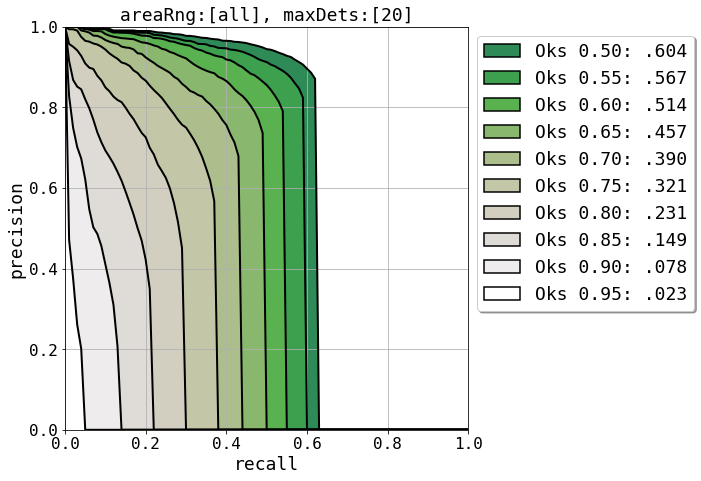

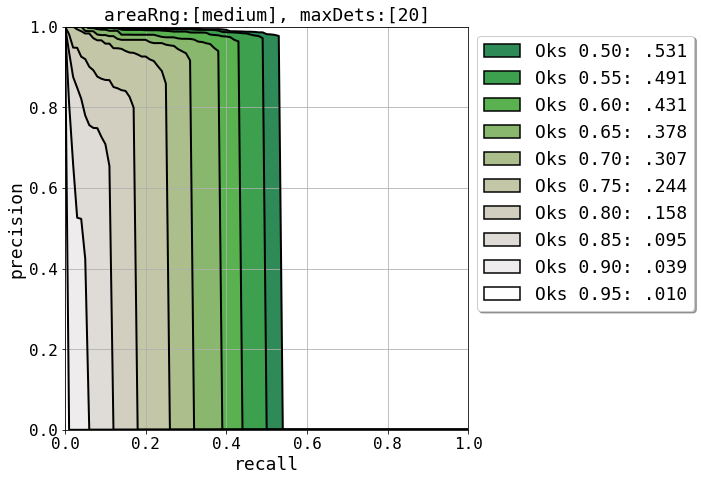

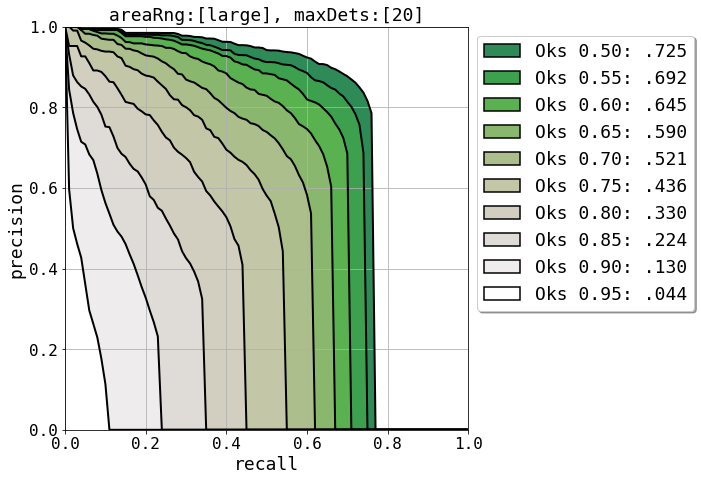

In [4]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
coco_analyze.evaluate(verbose=True, makeplots=True)

In [5]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [6]:
# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.05s).
DONE (t=6.66s).
Analyzing detection scores...
<mrr:2.0>Running per image *optimal score* evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=1.98s).
DONE (t=2.98s).
Analyzing background false positives and false negatives...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.18s).
DONE (t=3.16s).


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.72s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting area range [all]:
Correcting error type [miss]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.54s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting error type [swap]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.26s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting error type [inversion]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.44s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.06s).
Correcting error type [jitter]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.32s).
<mrr:2.0

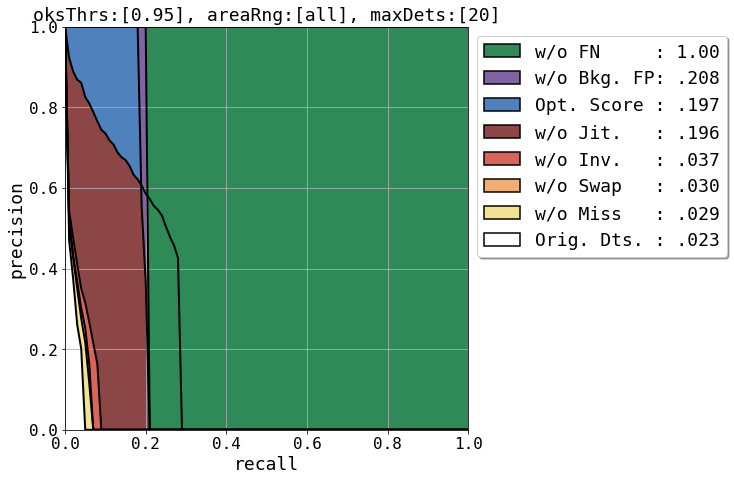

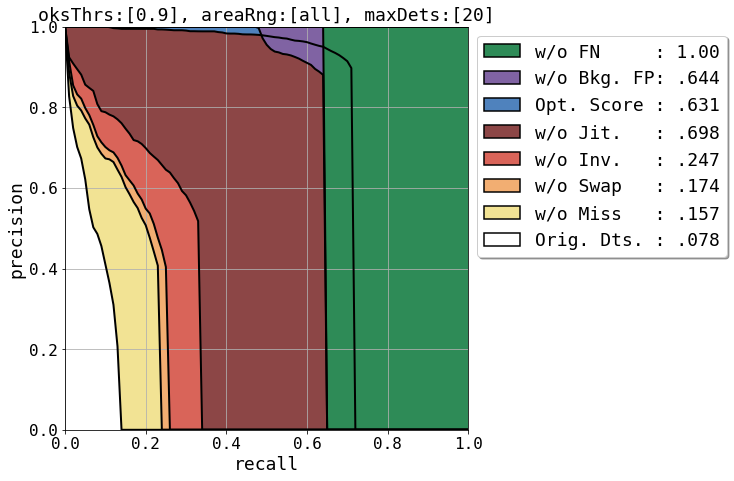

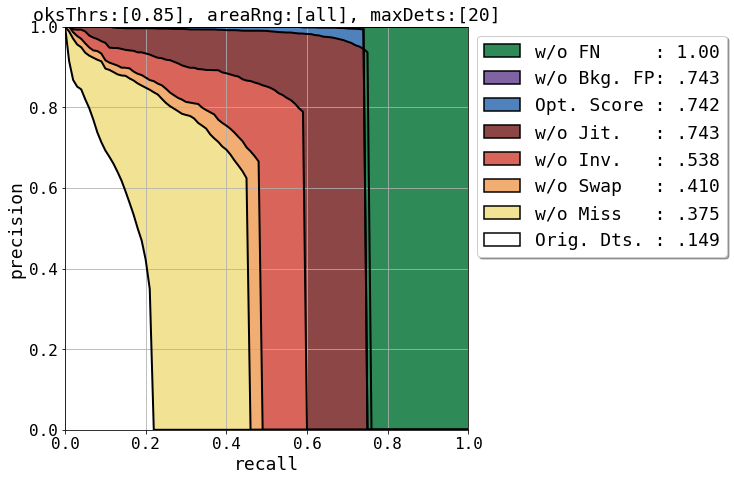

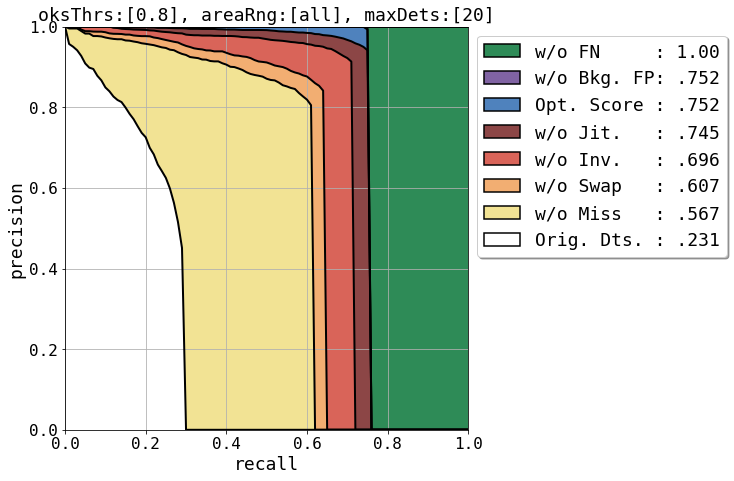

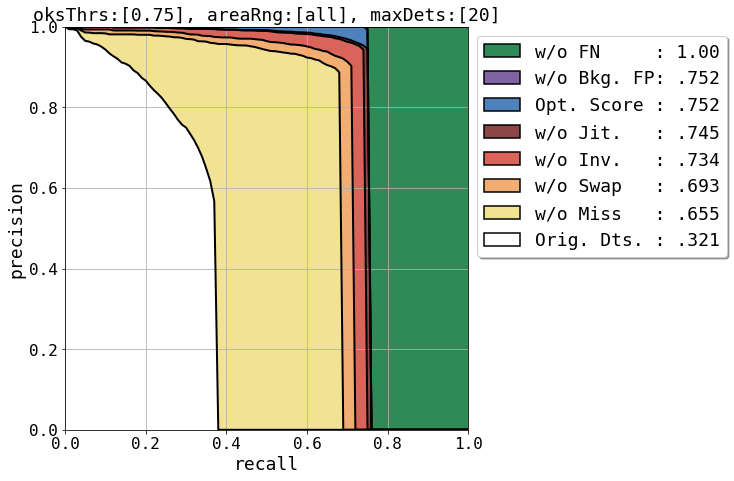

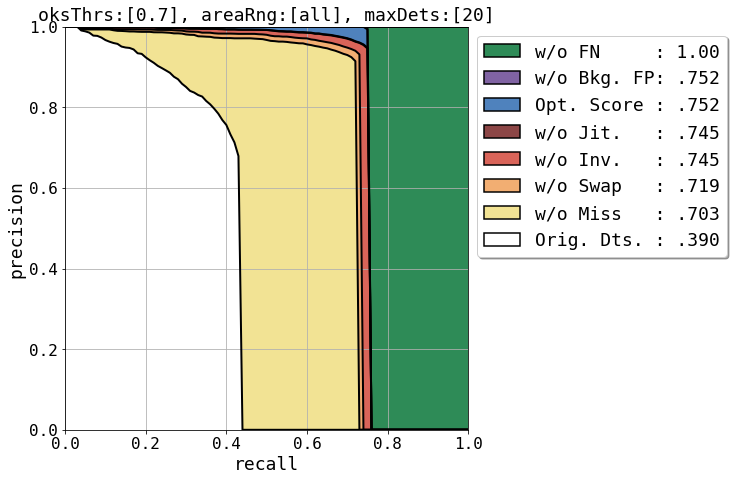

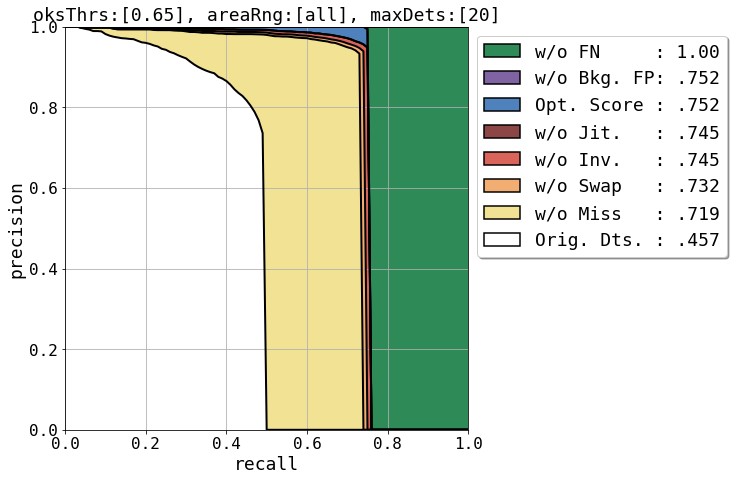

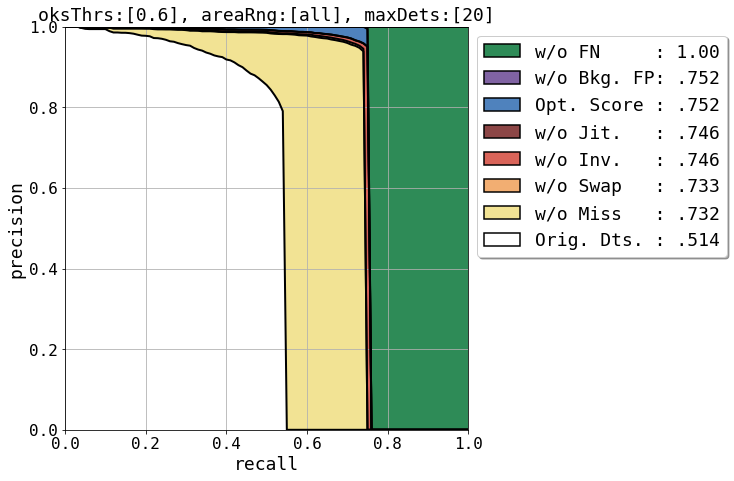

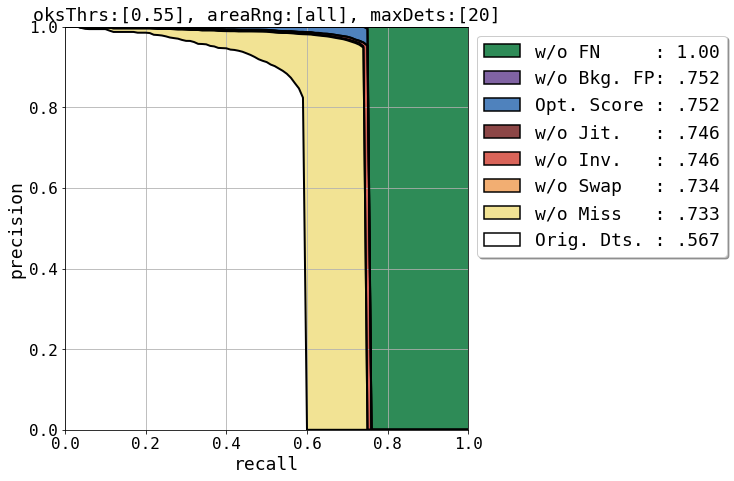

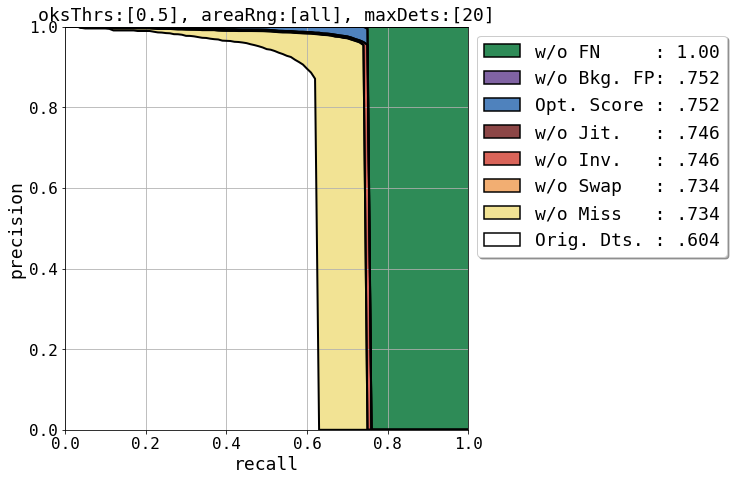

In [7]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [8]:
## print the performance summary 
for stat in coco_analyze.stats: print(stat)

{'oks': 0.95, 'recall': 0.048646095717884134, 'auc': 0.022851315375726367, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.9, 'recall': 0.13066750629722923, 'auc': 0.07775980807697844, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.85, 'recall': 0.21331863979848867, 'auc': 0.14881112094329707, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.8, 'recall': 0.29282115869017633, 'auc': 0.2313871854142826, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.75, 'recall': 0.3731108312342569, 'auc': 0.32059831403137334, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.7, 'recall': 0.4393891687657431, 'auc': 0.3896918049972326, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.65, 'recall': 0.4998425692695214, 'auc': 0.4572487023987932, 'maxDets': 20, 'areaRngLbl': 'all', 'err': 'baseline'}
{'oks': 0.6, 'recall': 0.549433249370277, 'auc': 0.5142821195754591, 'maxDets': 20, 'areaRngLbl': 'all', 'err':

In [9]:
## after analyze() has been called the following variables are available

# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']

i = 17
# info on keypoint detection localization error
print('good: %s'%corrected_dts[i]['good'])
print('miss: %s'%corrected_dts[i]['miss'])
print('swap: %s'%corrected_dts[i]['swap'])
print('inv.: %s'%corrected_dts[i]['inversion'])
print('jit.: %s\n'%corrected_dts[i]['jitter'])

# corrected keypoint locations
print('predicted keypoints:\n %s'%corrected_dts[i]['keypoints'])
print('corrected keypoints:\n %s\n'%corrected_dts[i]['opt_keypoints'])

# optimal detection score
print('original score: %s'%corrected_dts[i]['score'])
print('optimal score:  %s\n'%corrected_dts[i]['opt_score'])

good: [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
miss: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
swap: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inv.: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
jit.: [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]

predicted keypoints:
 [400, 196, 2, 403, 194, 2, 400, 195, 2, 407, 194, 2, 400, 195, 2, 418, 200, 2, 401, 205, 2, 427, 211, 2, 404, 218, 2, 421, 221, 2, 407, 223, 2, 425, 222, 2, 415, 225, 2, 430, 232, 2, 416, 234, 2, 437, 253, 2, 0, 0, 0]
corrected keypoints:
 [398.6694367582203, 195, 2, 401.32934274636546, 192, 2, 400.0, 195, 2, 404.90116486683496, 192, 2, 400.0, 195, 2, 418.0, 200, 2, 403.03405784228465, 199, 2, 432.8538248689176, 215, 2, 400.8538248689176, 214, 2, 421.0, 221, 2, 395.2967700109864, 227, 2, 425.0, 222, 2, 415.0, 225, 2, 429.2400383832755, 228, 2, 396.6261127573519, 235, 2, 437.0, 253, 2, 393.7324601770611, 258, 0]

original score: 1.0722665786743164
optimal score:  0.92173636569329

In [10]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print("Oks:[%.2f] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts['all',str(oks)]),len(false_neg_gts['all',str(oks)])))

Oks:[0.50] - Num.FP:[257] - Num.FN:[5986]
Oks:[0.55] - Num.FP:[268] - Num.FN:[5995]
Oks:[0.60] - Num.FP:[281] - Num.FN:[6005]
Oks:[0.65] - Num.FP:[295] - Num.FN:[6019]
Oks:[0.70] - Num.FP:[296] - Num.FN:[6020]
Oks:[0.75] - Num.FP:[314] - Num.FN:[6035]
Oks:[0.80] - Num.FP:[334] - Num.FN:[6052]
Oks:[0.85] - Num.FP:[389] - Num.FN:[6106]
Oks:[0.90] - Num.FP:[925] - Num.FN:[6750]
Oks:[0.95] - Num.FP:[3313] - Num.FN:[9499]
